In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
dataFile = pd.read_csv('../PreprocessedDataset/heart.csv')
dataFile.shape

(746, 12)

## Data Visualization

/Users/dilain/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dilain/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dilain/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

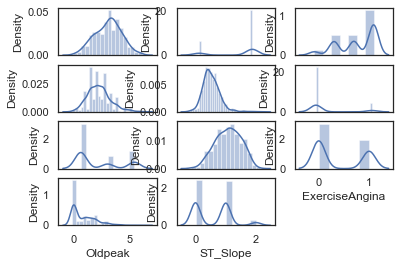

In [3]:
columns = dataFile.columns
columns = list(columns)
columns.pop()

sns.set(rc={'figure.figsize': (15, 17)})
sns.set_style(style='white')

for i in range(len(columns)):
    plt.subplot(4,3,i+1)
    cName = columns[i]
    sns.distplot(dataFile[cName])

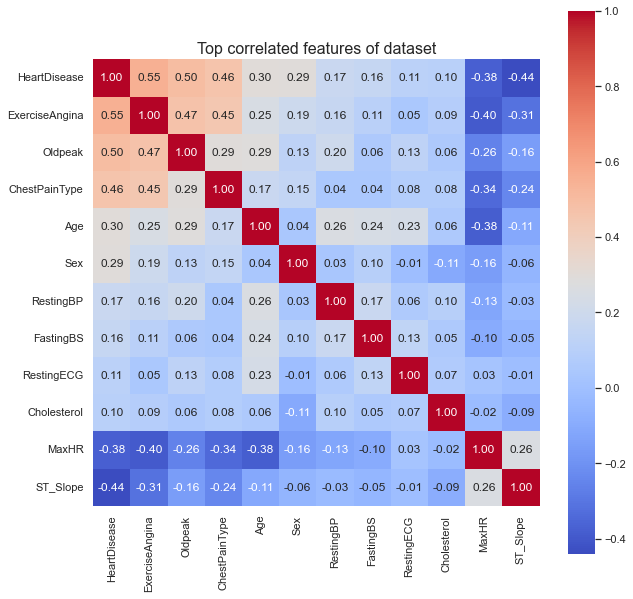

In [4]:
top = 13
corr = dataFile.corr()
top15 = corr.nlargest(top, 'HeartDisease')['HeartDisease'].index
corr_top15 = dataFile[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

<AxesSubplot:>

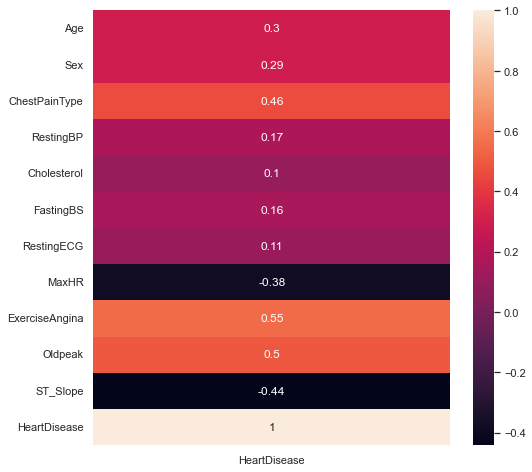

In [5]:
corr = dataFile.corr()[['HeartDisease']]
corr.multiply(100).T
sns.set(rc={'figure.figsize':(8,8)},font_scale=1)
sns.heatmap(corr,annot=True)

## KNeighbors Classifier

In [6]:
X = dataFile.drop('HeartDisease',1)
y = dataFile['HeartDisease']
print('shape of X and y :', X.shape, y.shape)


shape of X and y : (746, 11) (746,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Shape X and y (train) :', X_train.shape, y_train.shape)
print('Shape X and y (test) :', X_test.shape, y_test.shape)

Shape X and y (train) : (559, 11) (559,)
Shape X and y (test) : (187, 11) (187,)


In [10]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

Y_pred = model.predict(X_test)

score1 = model.score(X_train, y_train)
print('Training Score:', score1)

score2 = model.score(X_test, y_test)
print('Testing Score:', score2)

output = pd.DataFrame({'Predicted':Y_pred}) 
people = output.loc[output.Predicted == 1]["Predicted"]

rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print(f"-"*80)
print("Rate of people predicted with heart-disease:", rate_people)

# score_knc = score1
# out_knc = output

print(f"-"*80 + "\nClassification Report")
print(classification_report(y_test,Y_pred))

Training Score: 0.776386404293381
Testing Score: 0.6577540106951871
--------------------------------------------------------------------------------
Rate of people predicted with heart-disease: 0.45454545454545453
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.69      0.68        98
           1       0.65      0.62      0.63        89

    accuracy                           0.66       187
   macro avg       0.66      0.66      0.66       187
weighted avg       0.66      0.66      0.66       187



## Results Visualization

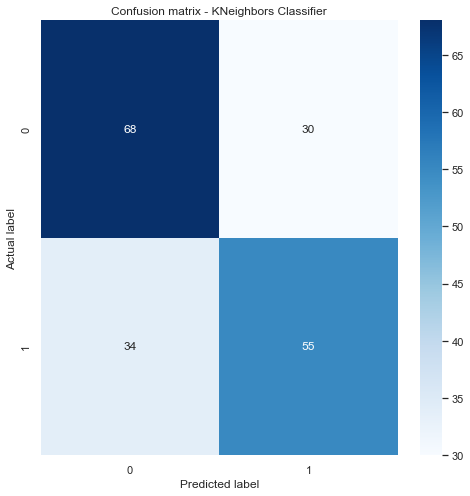

In [11]:
confusion_matrix = confusion_matrix(y_test,Y_pred)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'g')
plt.title('Confusion matrix - KNeighbors Classifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()